In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Datasets_ML/preprocessing_dataset.csv')

In [ ]:
data.head()

,Name,Age,Gender,Salary,Department
0,Alice,25.0,F,50000.0,HR
1,Bob,30.0,M,60000.0,Finance
2,Charlie,NaN,M,55000.0,IT
3,David,40.0,M,58000.0,HR
4,Eve,22.0,F,52000.0,IT


check for Missing values -> isnull,info,isna

In [ ]:
data.isnull().sum()

,0
Name,0
Age,1
Gender,1
Salary,1
Department,0


In [ ]:
data.isna().sum()

,0
Name,0
Age,1
Gender,1
Salary,1
Department,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        10 non-null     object 
 1   Age         9 non-null      float64
 2   Gender      9 non-null      object 
 3   Salary      9 non-null      float64
 4   Department  10 non-null     object 
dtypes: float64(2), object(3)
memory usage: 532.0+ bytes


<Axes: >

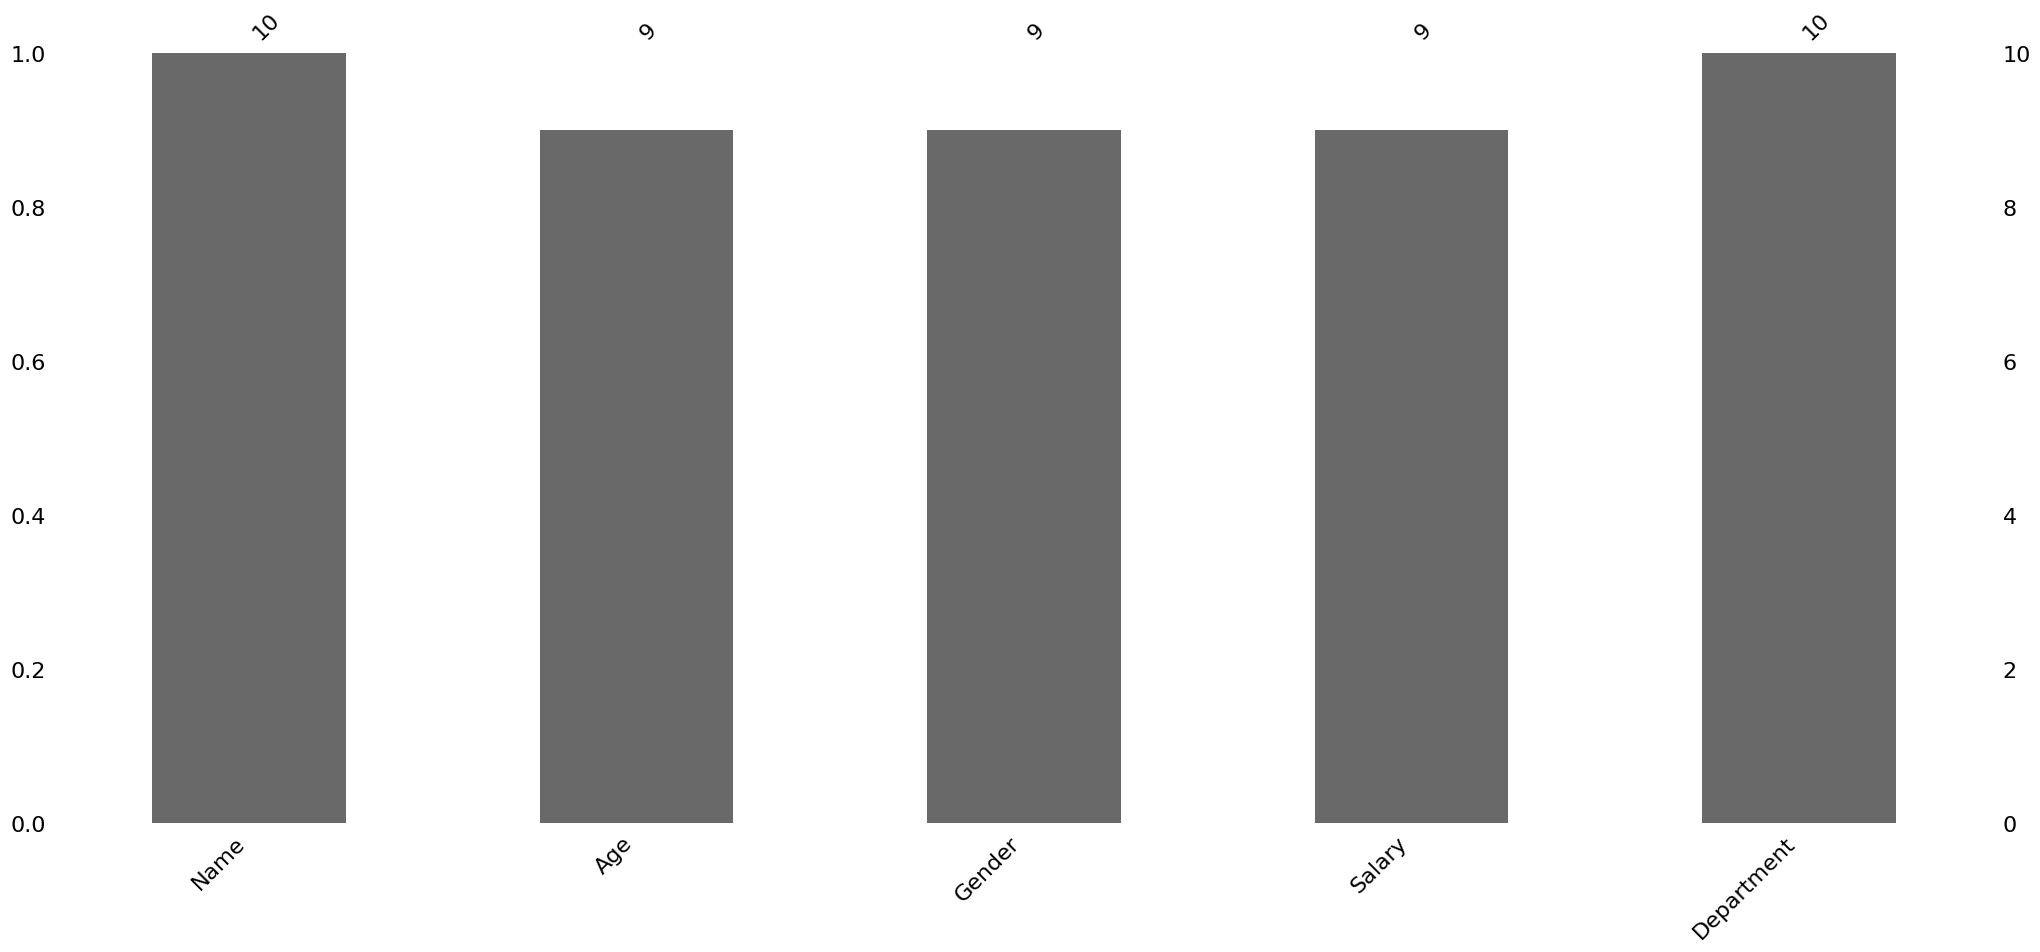

In [ ]:
!pip install missingno
import missingno as ms
ms.bar(data)

<Axes: >

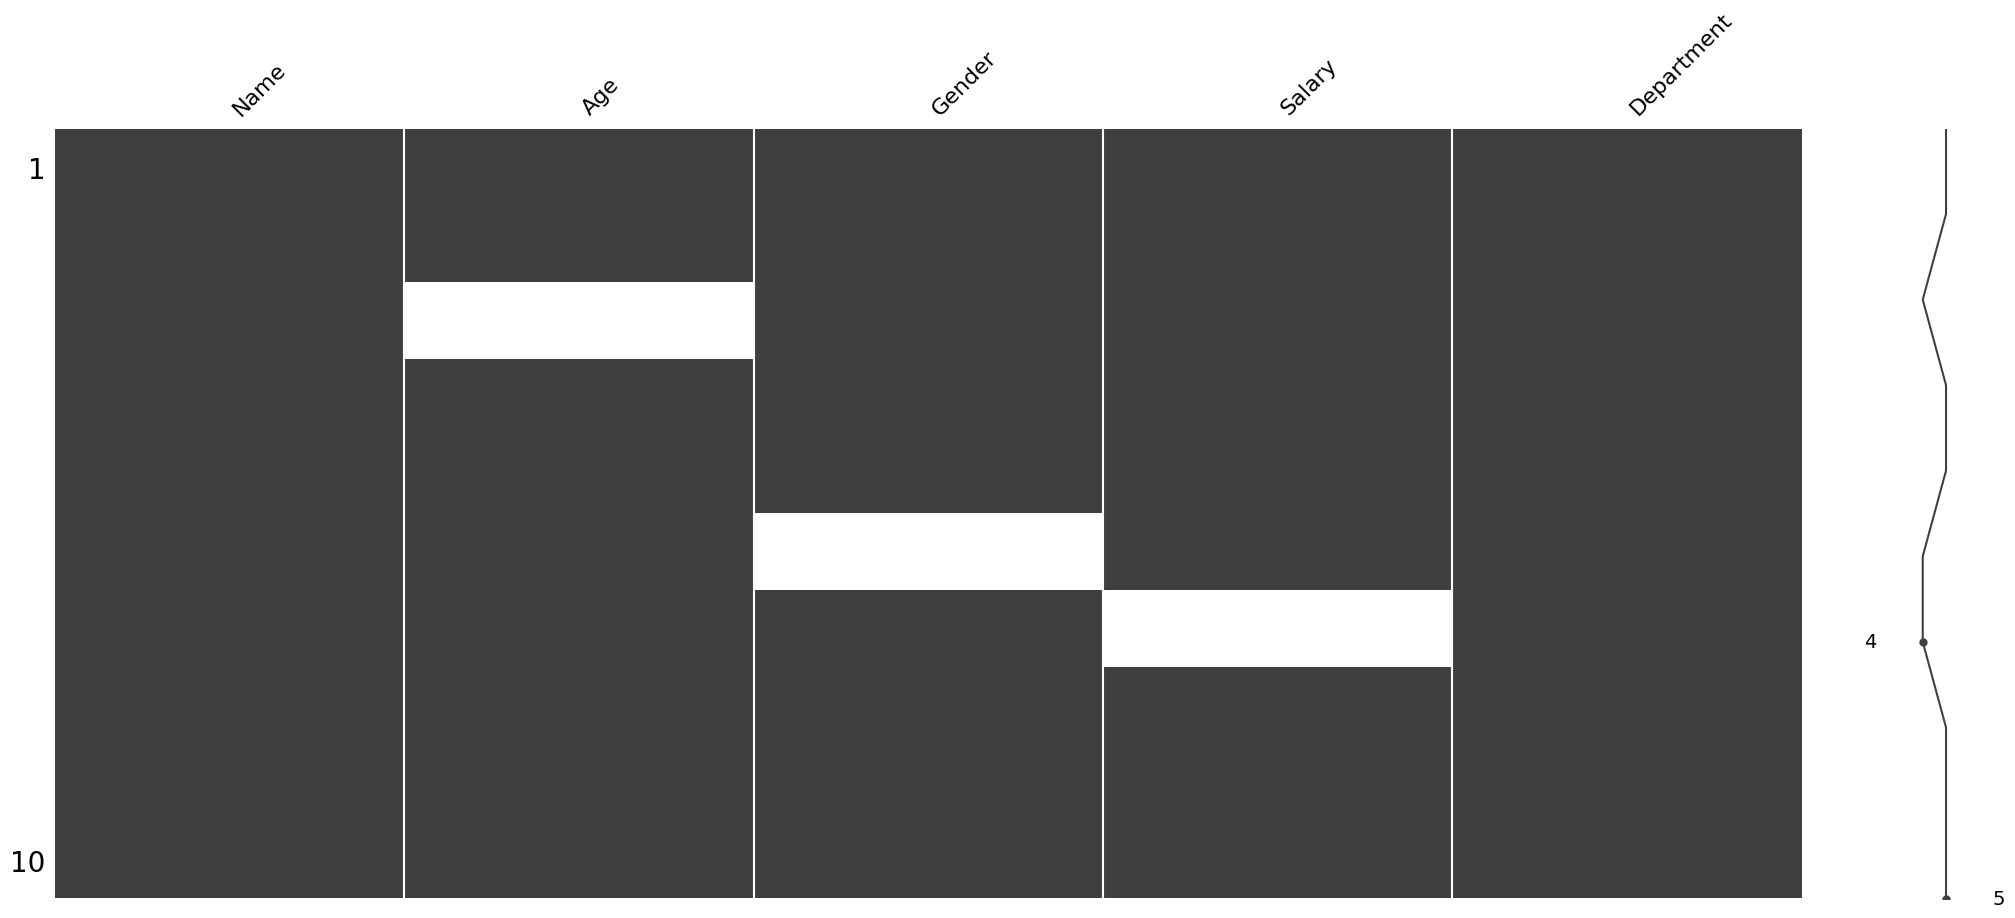

In [ ]:
ms.matrix(data)

In [ ]:
import seaborn as sns

<Axes: >

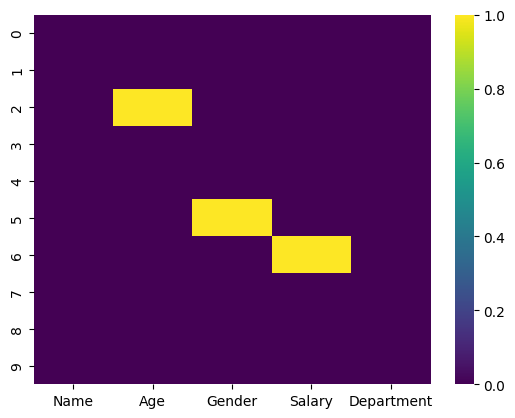

In [ ]:
sns.heatmap(data.isnull(),cmap='viridis')

<Axes: >

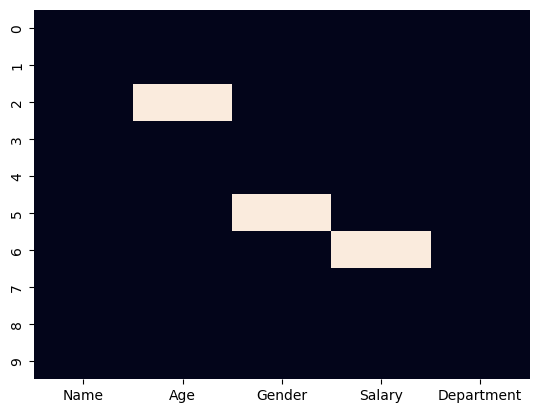

In [ ]:
sns.heatmap(data.isnull(),cbar=False)

Handle missing values

In [ ]:
# data.dropna(inplace=True)
# data

In [ ]:
data['Age'].fillna(data['Age'].median(),inplace=True)
data['Salary'].fillna(data['Salary'].mean(),inplace=True)
data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)
data

,Name,Age,Gender,Salary,Department
0,Alice,25.0,F,50000.000000,HR
1,Bob,30.0,M,60000.000000,Finance
2,Charlie,29.0,M,55000.000000,IT
3,David,40.0,M,58000.000000,HR
4,Eve,22.0,F,52000.000000,IT
5,Frank,35.0,M,61000.000000,Finance
6,Grace,120.0,F,57777.777778,Finance
7,Henry,28.0,M,59000.000000,HR
8,Ivy,29.0,F,63000.000000,IT
9,Jack,27.0,M,62000.000000,Finance


In [ ]:
# from sklearn.impute import SimpleImputer
# im=SimpleImputer(strategy='median')
# data['Age']=im.fit_transform(data['Age'])

Outliers

<Axes: ylabel='Age'>

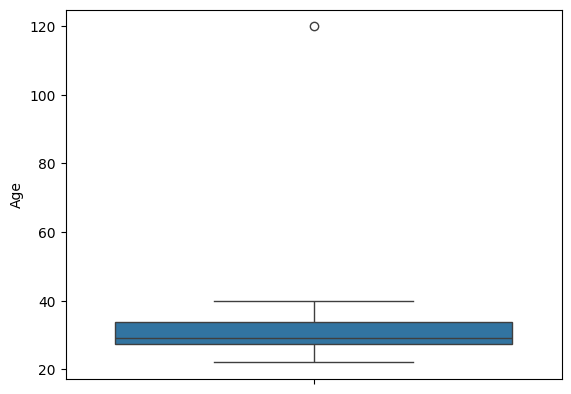

In [ ]:
sns.boxplot(data['Age'])

<Axes: ylabel='Salary'>

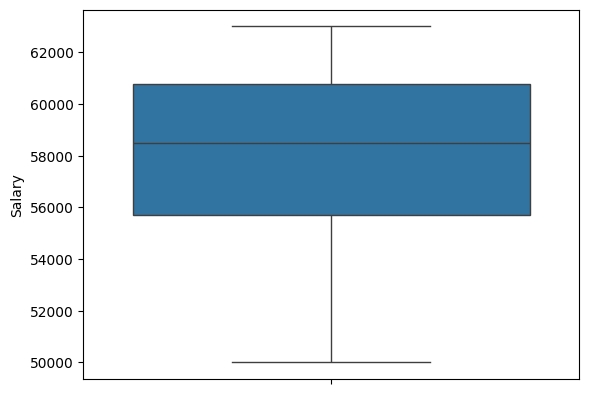

In [ ]:
sns.boxplot(data['Salary'])

In [ ]:
q1=data['Age'].quantile(0.25)
q3=data['Age'].quantile(0.75)
iqr=q3-q1
upper=q3+1.5*iqr
lower=q1-1.5*iqr
outliers=data[(data['Age']<lower) |(data['Age']>upper)]
outliers

,Name,Age,Gender,Salary,Department
6,Grace,120.0,F,57777.777778,Finance


zscore works based on sd to detect outliers

In [ ]:
from scipy.stats import zscore
z=zscore(data['Age'])
data[np.abs(z)>2.5]

,Name,Age,Gender,Salary,Department
6,Grace,120.0,F,57777.777778,Finance


In [ ]:
import matplotlib.pyplot as plt

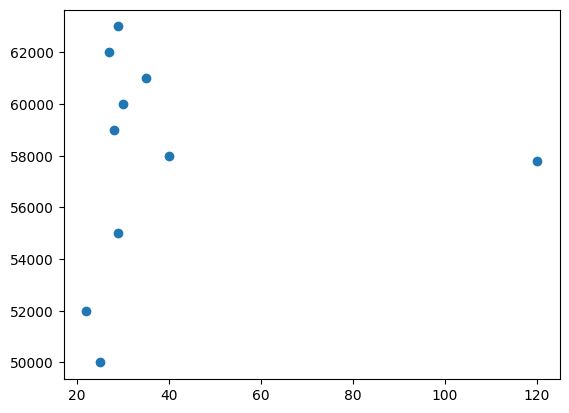

In [ ]:
plt.scatter(data['Age'],data['Salary'])

In [ ]:
from sklearn.ensemble import IsolationForest
iso=IsolationForest(contamination=0.1) # contamination -> 10% may be outliers in the data
data['outlier']=iso.fit_predict(data[['Age','Salary']])
data[data['outlier']==-1] # -1 -> outlier

,Name,Age,Gender,Salary,Department,outlier
6,Grace,120.0,F,57777.777778,Finance,-1


Handle outlier

In [ ]:
data['Age']=np.where(data['Age']>100,data['Age'].median(),data['Age'])
data

,Name,Age,Gender,Salary,Department,outlier
0,Alice,25.0,F,50000.000000,HR,1
1,Bob,30.0,M,60000.000000,Finance,1
2,Charlie,29.0,M,55000.000000,IT,1
3,David,40.0,M,58000.000000,HR,1
4,Eve,22.0,F,52000.000000,IT,1
5,Frank,35.0,M,61000.000000,Finance,1
6,Grace,29.0,F,57777.777778,Finance,-1
7,Henry,28.0,M,59000.000000,HR,1
8,Ivy,29.0,F,63000.000000,IT,1
9,Jack,27.0,M,62000.000000,Finance,1


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Gender_encoder']=le.fit_transform(data['Gender'])
data

,Name,Age,Gender,Salary,Department,outlier,Gender_encoder
0,Alice,25.0,F,50000.000000,HR,1,0
1,Bob,30.0,M,60000.000000,Finance,1,1
2,Charlie,29.0,M,55000.000000,IT,1,1
3,David,40.0,M,58000.000000,HR,1,1
4,Eve,22.0,F,52000.000000,IT,1,0
5,Frank,35.0,M,61000.000000,Finance,1,1
6,Grace,29.0,F,57777.777778,Finance,-1,0
7,Henry,28.0,M,59000.000000,HR,1,1
8,Ivy,29.0,F,63000.000000,IT,1,0
9,Jack,27.0,M,62000.000000,Finance,1,1


In [ ]:
# data=pd.get_dummies(data,columns=['Department'])
# data

In [ ]:
from sklearn.preprocessing import OneHotEncoder
oh=OneHotEncoder(sparse_output=False)
data['Department']=oh.fit_transform(data[['Department']])
data

,Name,Age,Gender,Salary,Department,outlier,Gender_encoder
0,Alice,25.0,F,50000.000000,0.0,1,0
1,Bob,30.0,M,60000.000000,1.0,1,1
2,Charlie,29.0,M,55000.000000,0.0,1,1
3,David,40.0,M,58000.000000,0.0,1,1
4,Eve,22.0,F,52000.000000,0.0,1,0
5,Frank,35.0,M,61000.000000,1.0,1,1
6,Grace,29.0,F,57777.777778,1.0,-1,0
7,Henry,28.0,M,59000.000000,0.0,1,1
8,Ivy,29.0,F,63000.000000,0.0,1,0
9,Jack,27.0,M,62000.000000,1.0,1,1


In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data['new_age']=sc.fit_transform(data[['Age']])
data

,Name,Age,Gender,Salary,Department,outlier,Gender_encoder,new_age
0,Alice,25.0,F,50000.000000,0.0,1,0,-0.924729
1,Bob,30.0,M,60000.000000,1.0,1,1,0.126099
2,Charlie,29.0,M,55000.000000,0.0,1,1,-0.084066
3,David,40.0,M,58000.000000,0.0,1,1,2.227756
4,Eve,22.0,F,52000.000000,0.0,1,0,-1.555226
5,Frank,35.0,M,61000.000000,1.0,1,1,1.176928
6,Grace,29.0,F,57777.777778,1.0,-1,0,-0.084066
7,Henry,28.0,M,59000.000000,0.0,1,1,-0.294232
8,Ivy,29.0,F,63000.000000,0.0,1,0,-0.084066
9,Jack,27.0,M,62000.000000,1.0,1,1,-0.504398


In [ ]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
data['nm_age']=mm.fit_transform(data[['Age']])
data

,Name,Age,Gender,Salary,Department,outlier,Gender_encoder,new_age,nm_age
0,Alice,25.0,F,50000.000000,0.0,1,0,-0.924729,0.166667
1,Bob,30.0,M,60000.000000,1.0,1,1,0.126099,0.444444
2,Charlie,29.0,M,55000.000000,0.0,1,1,-0.084066,0.388889
3,David,40.0,M,58000.000000,0.0,1,1,2.227756,1.000000
4,Eve,22.0,F,52000.000000,0.0,1,0,-1.555226,0.000000
5,Frank,35.0,M,61000.000000,1.0,1,1,1.176928,0.722222
6,Grace,29.0,F,57777.777778,1.0,-1,0,-0.084066,0.388889
7,Henry,28.0,M,59000.000000,0.0,1,1,-0.294232,0.333333
8,Ivy,29.0,F,63000.000000,0.0,1,0,-0.084066,0.388889
9,Jack,27.0,M,62000.000000,1.0,1,1,-0.504398,0.277778
